<a href="https://colab.research.google.com/github/bhavesh-choudhary1/machine_learning_concept/blob/main/Handling_Outlier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('train.csv')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<ipython-input-4-d486bde32063>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'],kde = True)


<Axes: xlabel='Age', ylabel='Density'>

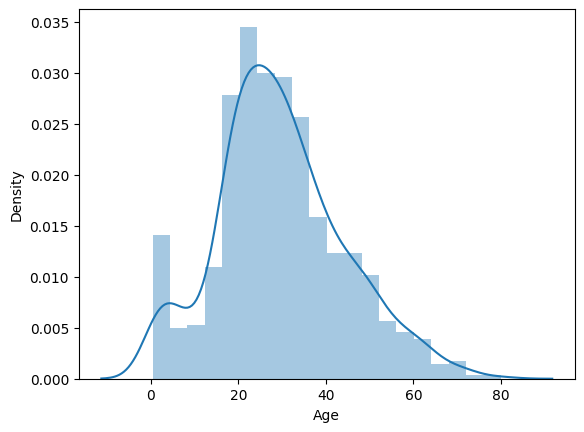

In [ ]:
sns.distplot(df['Age'],kde = True)

<Axes: ylabel='Age'>

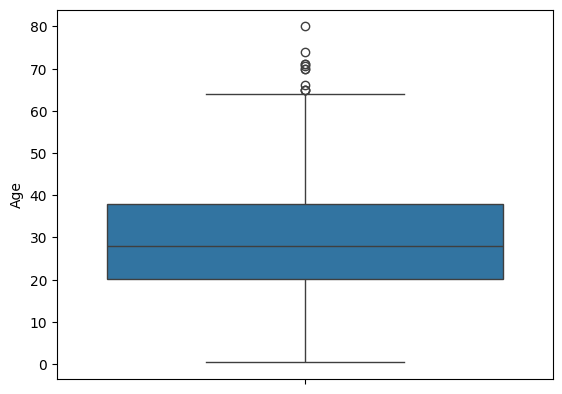

In [ ]:
sns.boxplot(df['Age'])

In [ ]:
df.describe()['Age']

,Age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


In [ ]:
per75 = df['Age'].quantile(0.75)
per25 = df['Age'].quantile(0.25)

In [ ]:
per75,per25

(38.0, 20.125)

In [ ]:
iqr = per75 - per25

In [ ]:
iqr

17.875

In [ ]:
upper_limit = per75 + 1.5*iqr
lower_limit = per25 - 1.5*iqr

In [ ]:
upper_limit,lower_limit

(64.8125, -6.6875)

In [ ]:
df[(df['Age'] > upper_limit) | (df['Age'] < lower_limit)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q
456,457,0,1,"Millet, Mr. Francis Davis",male,65.0,0,0,13509,26.5500,E38,S
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S


## Trimming

In [ ]:
new_df = df[(df['Age'] < upper_limit)]

In [ ]:
new_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
new_df['Age'].describe()

,Age
count,703.000000
mean,29.072077
std,13.728478
min,0.420000
25%,20.000000
50%,28.000000
75%,38.000000
max,64.000000


<ipython-input-17-623e0c0b3a27>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['Age'],kde=True)


<Axes: xlabel='Age', ylabel='Density'>

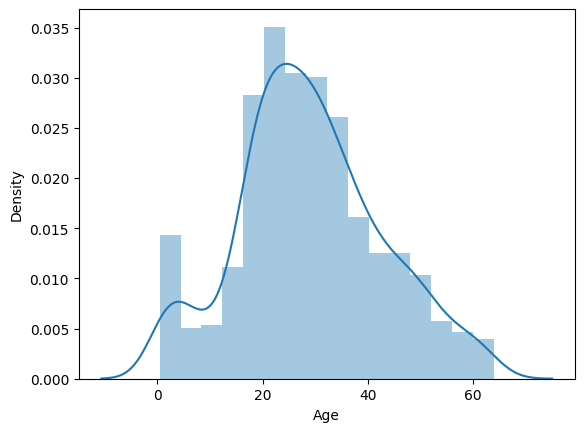

In [ ]:
sns.distplot(new_df['Age'],kde=True)

<Axes: ylabel='Age'>

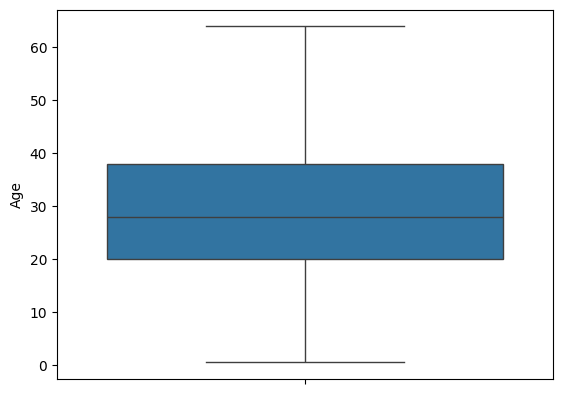

In [ ]:
sns.boxplot(new_df['Age'])

##Capping

In [ ]:
df2 = df.copy()

In [ ]:
df2['Age'] = np.where(df2['Age']>upper_limit,
                      upper_limit,
                      np.where(df2['Age']<lower_limit,
                               lower_limit,
                               df2['Age']))

In [ ]:
df2['Age'].describe()

,Age
count,714.000000
mean,29.622700
std,14.316665
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,64.812500


<Axes: ylabel='Age'>

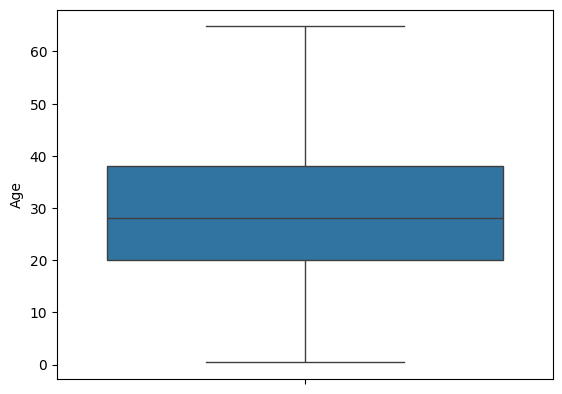

In [ ]:
sns.boxplot(df2['Age'])

<ipython-input-23-320cde88b94d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2['Age'])


<Axes: xlabel='Age', ylabel='Density'>

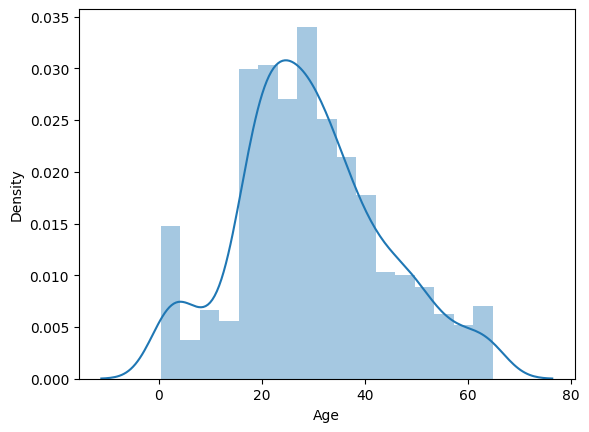

In [ ]:
sns.distplot(df2['Age'])

Fare column

In [ ]:
df['Fare'].describe()

,Fare
count,891.000000
mean,32.204208
std,49.693429
min,0.000000
25%,7.910400
50%,14.454200
75%,31.000000
max,512.329200


<Axes: ylabel='Fare'>

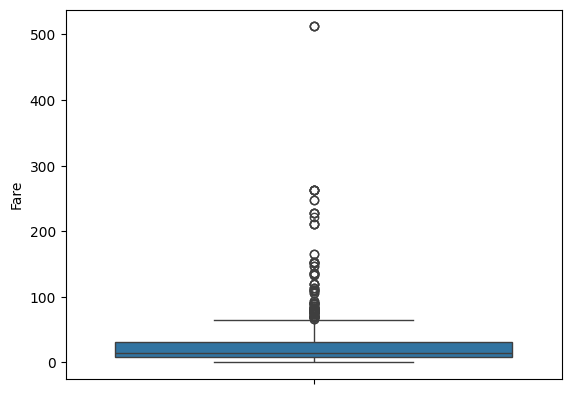

In [ ]:
sns.boxplot(df['Fare'])

<ipython-input-26-f34bd39c6a60>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Fare'],kde=True)


<Axes: xlabel='Fare', ylabel='Density'>

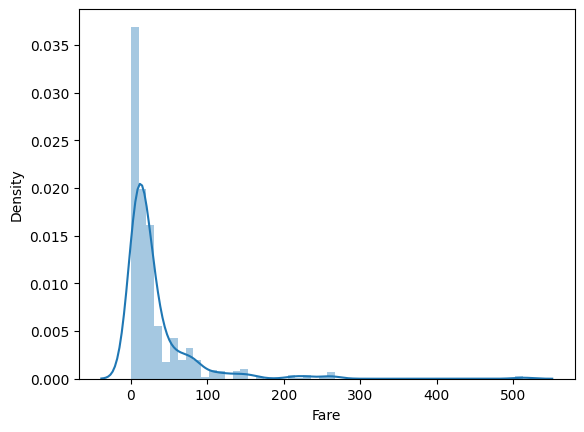

In [ ]:
sns.distplot(df['Fare'],kde=True)

In [ ]:
q3 = df['Fare'].quantile(0.75)
q1 = df['Fare'].quantile(0.25)

In [ ]:
q3,q1

(31.0, 7.9104)

In [ ]:
iqr = q3 - q1

In [ ]:
iqr

23.0896

In [ ]:
upper_limit1 = q3 + 1.5*iqr
lower_limit1 = q1 - 1.5*iqr

In [ ]:
upper_limit1,lower_limit1

(65.6344, -26.724)

##Trimming

In [ ]:
df[(df['Fare']>upper_limit1) | (df['Fare']<lower_limit1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
...,...,...,...,...,...,...,...,...,...,...,...,...
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.5500,NaN,S
849,850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,NaN,1,0,17453,89.1042,C92,C
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S


In [ ]:
new_df = df[(df['Fare']<upper_limit1)]

In [ ]:
new_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<Axes: ylabel='Fare'>

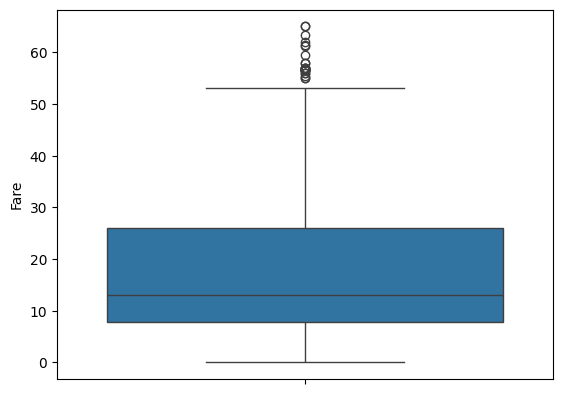

In [ ]:
sns.boxplot(new_df['Fare'])

<ipython-input-37-3345498c0c76>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['Fare'],kde=True)


<Axes: xlabel='Fare', ylabel='Density'>

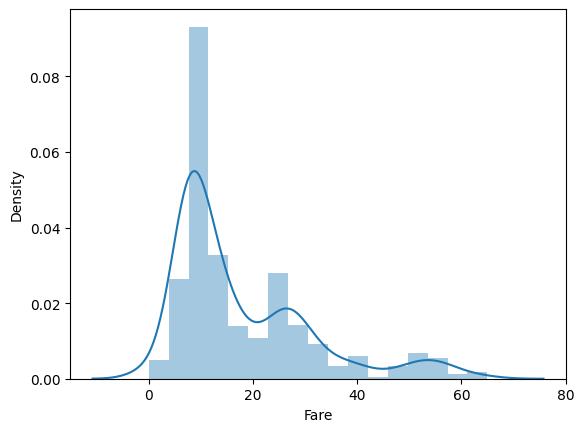

In [ ]:
sns.distplot(new_df['Fare'],kde=True)

In [ ]:
# Capping

In [ ]:
df2 = df.copy()

In [ ]:
df2['Fare'] = np.where(df2['Fare'] > upper_limit1,
                       upper_limit1,
                       np.where(df['Fare'] < lower_limit,
                                lower_limit,
                                df['Fare']))

<Axes: ylabel='Fare'>

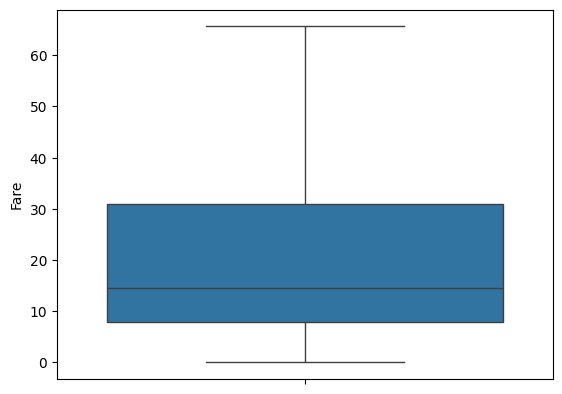

In [ ]:
sns.boxplot(df2['Fare'])

<ipython-input-42-fedd57d7f33d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2['Fare'],kde=True)


<Axes: xlabel='Fare', ylabel='Density'>

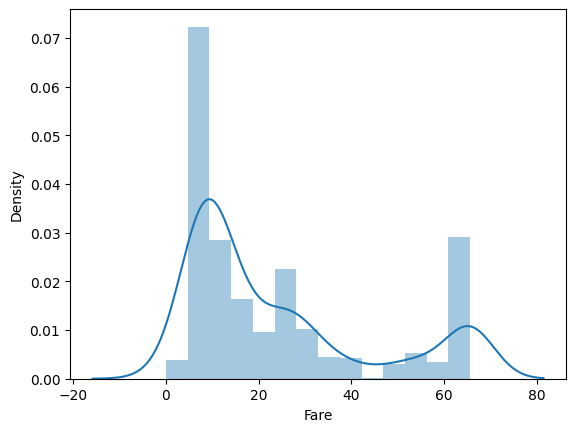

In [ ]:
sns.distplot(df2['Fare'],kde=True)

In [ ]:
df['Fare'].describe()

,Fare
count,891.000000
mean,32.204208
std,49.693429
min,0.000000
25%,7.910400
50%,14.454200
75%,31.000000
max,512.329200


In [ ]:
df2['Fare'].describe()

,Fare
count,891.000000
mean,24.046813
std,20.481625
min,0.000000
25%,7.910400
50%,14.454200
75%,31.000000
max,65.634400


In [ ]:
df = pd.read_csv('Placement.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'Placement.csv'

In [ ]:
df.head()

In [ ]:
sns.boxplot(df['Student_ID'])

In [ ]:
sns.boxplot(df['CGPA'])

In [ ]:
sns.boxplot(df['IQ'])

###new dataset


In [ ]:
df3 = pd.read_csv('/content/placement1.csv')

In [ ]:
df3.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


<Axes: ylabel='cgpa'>

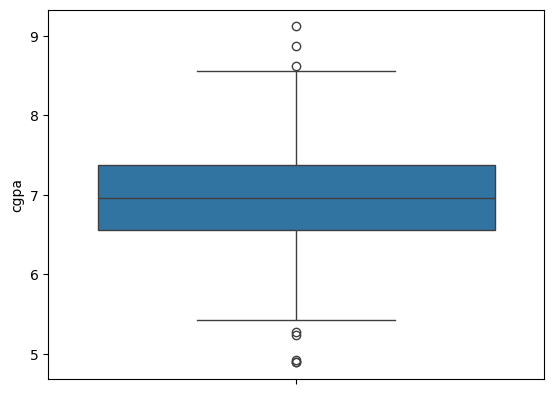

In [ ]:
sns.boxplot(df3['cgpa'])

<ipython-input-49-65d002c1f4b6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3['cgpa'],kde=True)


<Axes: xlabel='cgpa', ylabel='Density'>

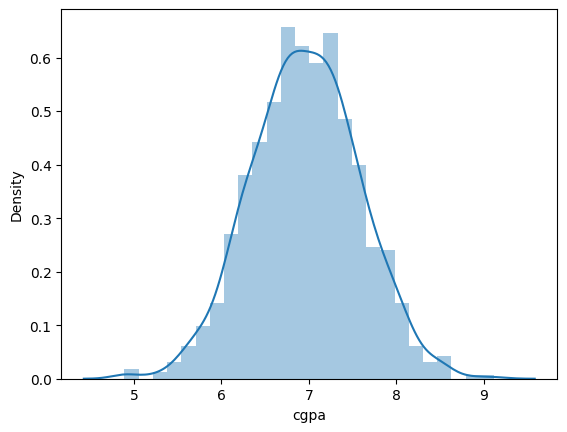

In [ ]:
sns.distplot(df3['cgpa'],kde=True)

<Axes: ylabel='placement_exam_marks'>

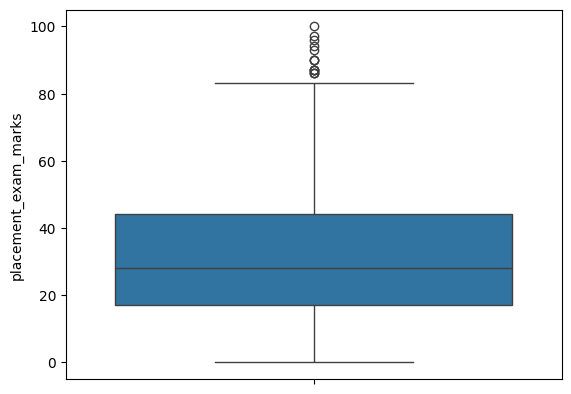

In [ ]:
sns.boxplot(df3['placement_exam_marks'])

<ipython-input-58-937596d7b162>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3['placement_exam_marks'],kde=True)


<Axes: xlabel='placement_exam_marks', ylabel='Density'>

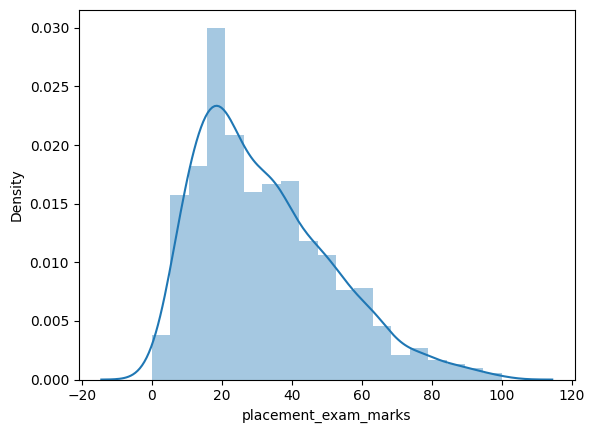

In [ ]:
sns.distplot(df3['placement_exam_marks'],kde=True)

In [ ]:
df3['placement_exam_marks'].describe()

,placement_exam_marks
count,1000.000000
mean,32.225000
std,19.130822
min,0.000000
25%,17.000000
50%,28.000000
75%,44.000000
max,100.000000


In [ ]:
q3 = df3['placement_exam_marks'].quantile(0.75)
q1 = df3['placement_exam_marks'].quantile(0.25)

In [ ]:
q3,q1

(44.0, 17.0)

In [ ]:
iqr = q3-q1

In [ ]:
iqr

27.0

In [ ]:
upper_limit2 = q3 + 1.5*iqr
lower_limit2 = q1 - 1.5*iqr

In [ ]:
upper_limit2,lower_limit2

(84.5, -23.5)

In [ ]:
df3[(df3['placement_exam_marks']> upper_limit2) | (df3['placement_exam_marks'] < lower_limit2)]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [ ]:
# trimming

new_df  = df3[(df3['placement_exam_marks']< upper_limit2)]

In [ ]:
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


In [ ]:
df3

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


In [ ]:
# capping

df4 = df3.copy()

In [ ]:
df4['placement_exam_marks'] = np.where(df4['placement_exam_marks']>upper_limit2,
                                       upper_limit2,
                                       np.where(df4['placement_exam_marks']<lower_limit2,
                                                lower_limit2,
                                                df4['placement_exam_marks']))

<Axes: ylabel='placement_exam_marks'>

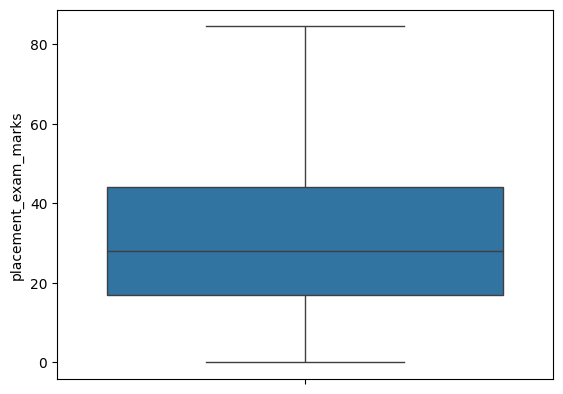

In [ ]:
sns.boxplot(df4['placement_exam_marks'])

<ipython-input-73-ab86d9310931>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df4['placement_exam_marks'],kde=True)


<Axes: xlabel='placement_exam_marks', ylabel='Density'>

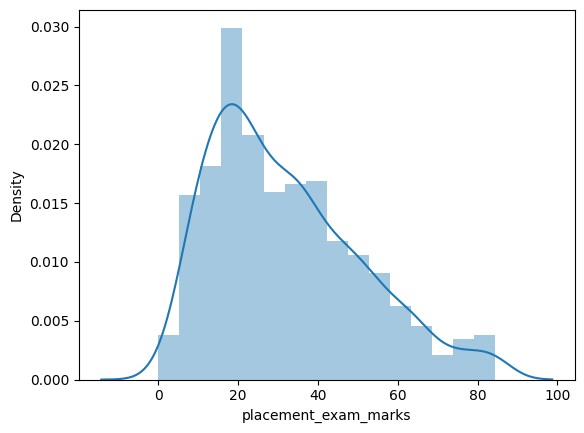

In [ ]:
sns.distplot(df4['placement_exam_marks'],kde=True)

In [ ]:
df3['placement_exam_marks'].describe()

,placement_exam_marks
count,1000.000000
mean,32.225000
std,19.130822
min,0.000000
25%,17.000000
50%,28.000000
75%,44.000000
max,100.000000


In [ ]:
df4['placement_exam_marks'].describe()

,placement_exam_marks
count,1000.000000
mean,32.136500
std,18.865419
min,0.000000
25%,17.000000
50%,28.000000
75%,44.000000
max,84.500000


<Axes: ylabel='cgpa'>

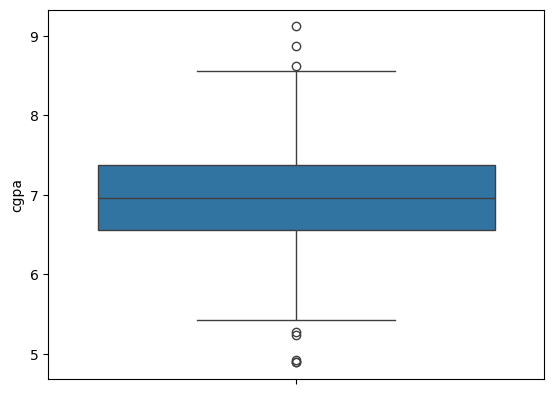

In [ ]:
sns.boxplot(df4['cgpa'])

In [ ]:
highest_value = df4['cgpa'].mean() + 3*df4['cgpa'].std()
lowest_value = df4['cgpa'].mean() - 3*df4['cgpa'].std()